In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading data and checking data if there exist any null points.

In [2]:
# solution code
jewel_df = pd.read_csv("jewel.csv")
jewel_df.isnull().sum() 

# there is no null value in this dataframe

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Checking potantial outliers for for "y", "z", "depth" and "table" attributes versus "price"

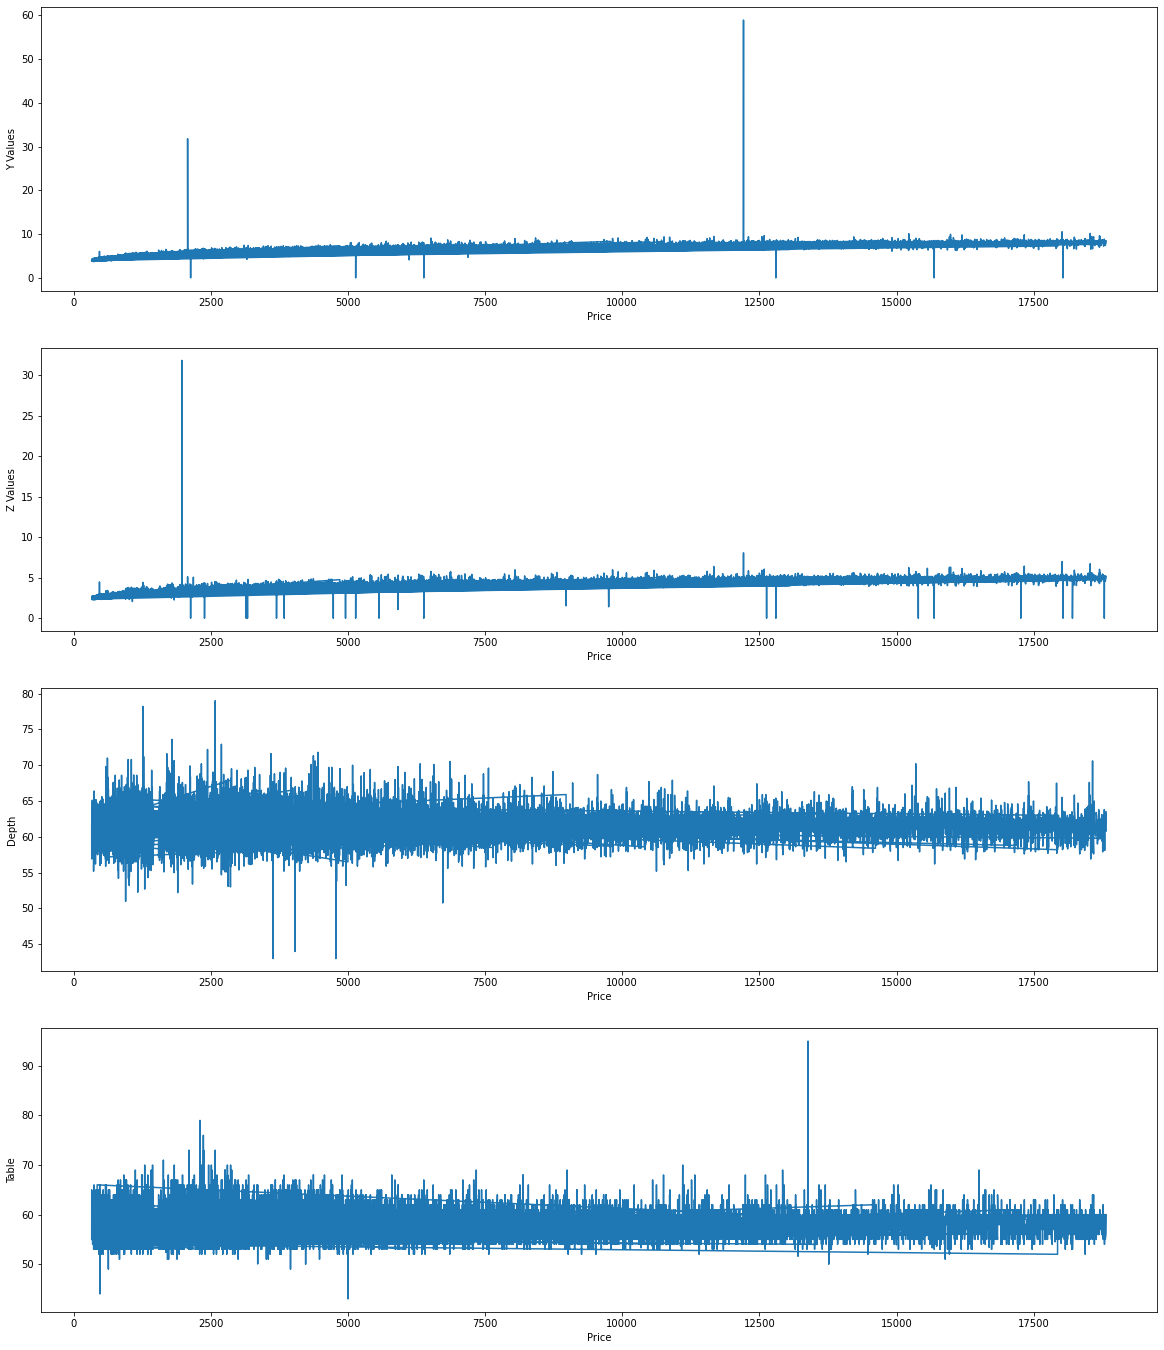

In [5]:
# solution code
def linePlotCreater(df):
    y_values = df["y"]
    z_values = df["z"]
    depth_values = df["depth"]
    table_values = df["table"]
    price_values = df["price"]

    fig, axs = plt.subplots(4, figsize=(20,24))

    axs[0].plot(price_values, y_values)
    axs[0].set_xlabel("Price")
    axs[0].set_ylabel("Y Values")

    axs[1].plot(price_values, z_values)
    axs[1].set_xlabel("Price")
    axs[1].set_ylabel("Z Values")

    axs[2].plot(price_values, depth_values)
    axs[2].set_xlabel("Price")
    axs[2].set_ylabel("Depth")

    axs[3].plot(price_values, table_values)
    axs[3].set_xlabel("Price")
    axs[3].set_ylabel("Table")

    plt.show()
    
linePlotCreater(jewel_df)

## Removing Outliers

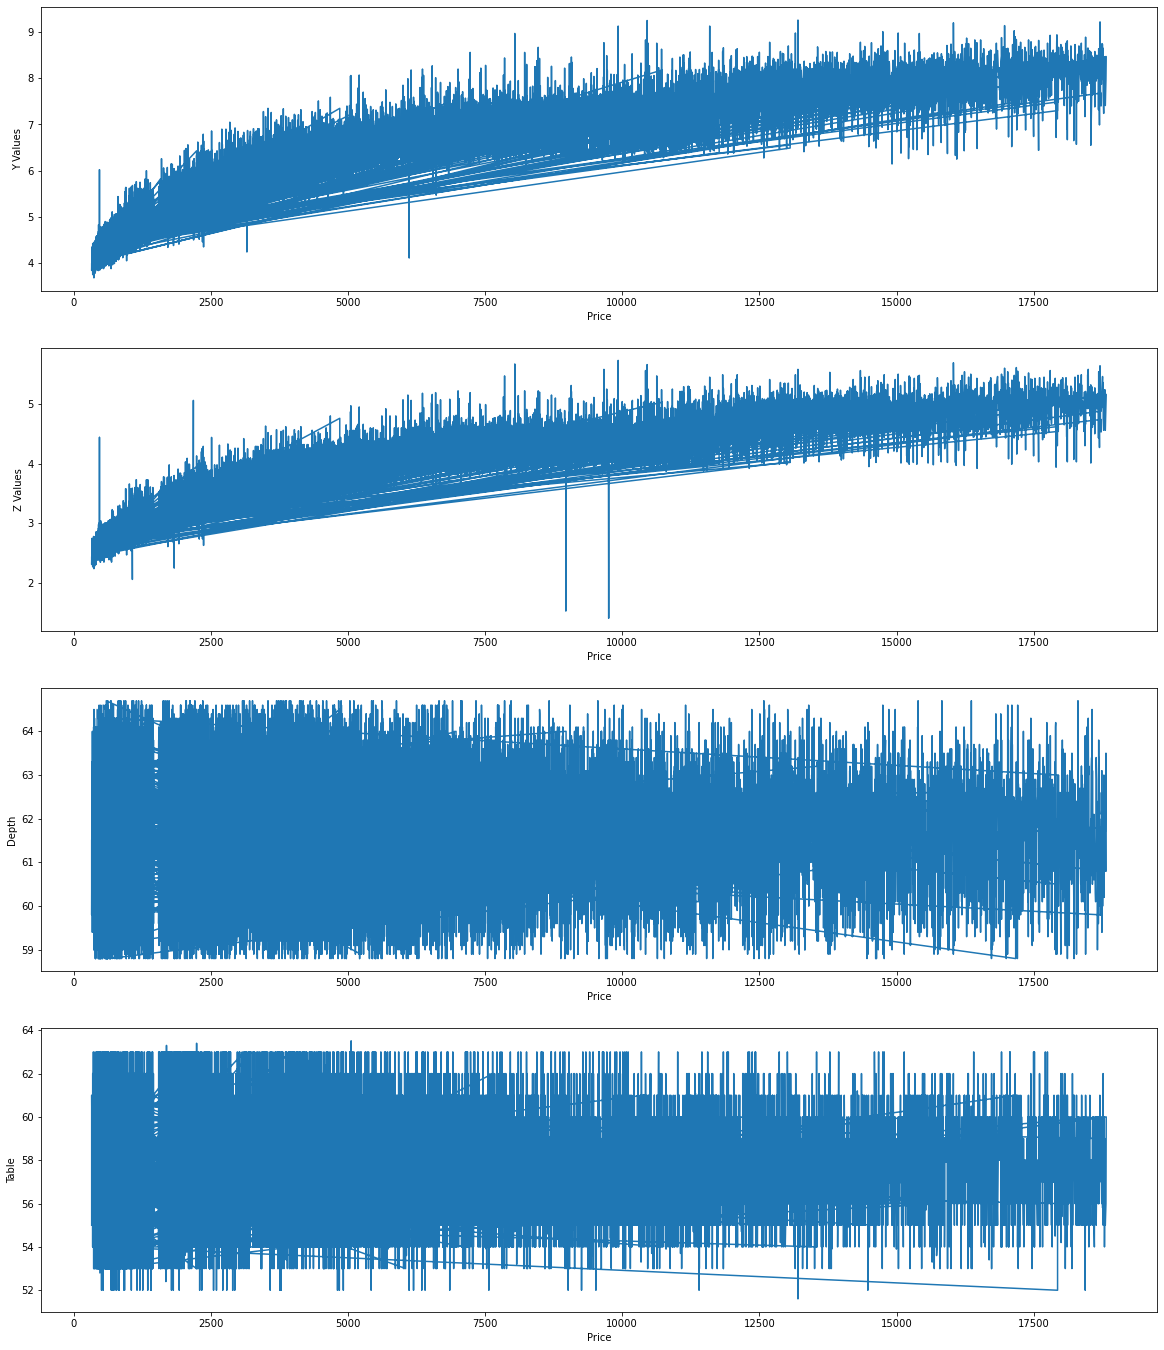

In [6]:

# I divided the data into quartiles. There are 4 quartiles. 
# If a value is lower than Q1-1.5*IQR or higher than Q3+1.5*IQR, this value is outlier and need to be removed from dataframe

def detect_remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    df = df[~( (df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)) ).any(axis=1)]
    return df

cols = ["y", "z", "depth", "table"]

removed_df = detect_remove_outliers(jewel_df, cols)
removed_df.reset_index(drop=True, inplace=True)


linePlotCreater(removed_df)

## Creating ordinal values for "cut", "color" and "clarity

- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [7]:
# solution code

removed_df["cut"].replace({"Good":1, "Very Good":2, "Fair":3, "Ideal":4, "Premium":5}, inplace=True)

removed_df["color"].replace({"J":1, "I":2, "H":3, "G":4, "F":5, "E":6, "D":7}, inplace=True)

removed_df["clarity"].replace({"I1":1, "SI1":2, "SI2":3, "VS1":4, "VS2":5, "VVS1":6, "VVS2":7, "IF":8}, inplace=True)

removed_df.head()


C:\Users\Eren\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
4,0.24,2,1,7,62.8,57.0,336,3.94,3.96,2.48


## Bar graph for analyzing the frequencies of "cut", "color", "clarity". 

<AxesSubplot:>

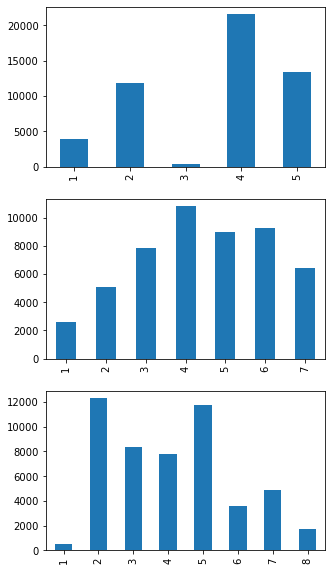

In [8]:
#
cut_freq = removed_df["cut"].value_counts().sort_index()
color_freq = removed_df["color"].value_counts().sort_index()
clarity_freq = removed_df["clarity"].value_counts().sort_index()

fig, axes = plt.subplots(3, figsize=(5,10))

cut_freq.plot(ax=axes[0], kind='bar')
color_freq.plot(ax=axes[1], kind='bar')
clarity_freq.plot(ax=axes[2], kind='bar')


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions is 


## Shuffle and Split Part
### Nothing predefined function used. This functions are coded.



In [9]:
import random # to get random int
import timeit

# This part may take about 30 seconds.

def shuffle_df(df):
    start = timeit.default_timer()
    
    n = df.shape[0] #length of dataframe
    print(n)
    
    for i in range(0,n,5): 
        rint = random.randint(0, n-1)
        df.iloc[i], df.iloc[rint] = df.iloc[rint], df.iloc[i] # It changes the values at that indexes.
        print(i, rint)
    
    stop = timeit.default_timer()
    print("time : ", stop - start)
    
    return df

        
removed_df = shuffle_df(removed_df)
removed_df.reset_index(drop=True, inplace=True)


50971
0 47226
5 46858
10 17014
15 3887
20 10799
25 31973
30 21322
35 21247
40 4209
45 17740
50 38033
55 28812
60 8184
65 22101
70 18275
75 31130
80 25333
85 185
90 2578
95 19833
100 36022
105 40731
110 1611
115 2268
120 21500
125 6419
130 2865
135 9258
140 12091
145 27140
150 11399
155 13460
160 47786
165 5258
170 14239
175 41776
180 49597
185 12496
190 42796
195 18467
200 40252
205 15157
210 18598
215 46787
220 44517
225 33504
230 33606
235 31139
240 1522


C:\Users\Eren\anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


245 8037
250 29454
255 37052
260 42951
265 14508
270 37095
275 33435
280 22312
285 28640
290 32987
295 49239
300 33721
305 35769
310 13809
315 127
320 35589
325 48908
330 10588
335 44696
340 11219
345 15187
350 30067
355 1812
360 3214
365 19744
370 50458
375 18065
380 25981
385 49763
390 15603
395 10191
400 36916
405 39075
410 36354
415 21011
420 19169
425 23224
430 5019
435 32562
440 36932
445 3476
450 7538
455 44620
460 1099
465 10371
470 33920
475 2257
480 45400
485 50940
490 50527
495 14635
500 24675
505 46839
510 41293
515 14353
520 42055
525 41495
530 7890
535 25384
540 39542
545 31107
550 18827
555 12318
560 16319
565 21834
570 7914
575 21221
580 25341
585 44521
590 45432
595 21277
600 17695
605 49624
610 45309
615 32139
620 31783
625 47716
630 22611
635 7244
640 22542
645 49008
650 6127
655 44589
660 20328
665 13871
670 2747
675 33046
680 7164
685 1577
690 17386
695 45811
700 50966
705 19314
710 10511
715 32939
720 720
725 39347
730 24887
735 23980
740 36560
745 47138
750 9634


4325 36897
4330 42504
4335 47817
4340 12921
4345 19287
4350 20285
4355 33882
4360 11630
4365 24257
4370 18834
4375 16138
4380 18414
4385 23900
4390 20855
4395 17230
4400 34617
4405 9644
4410 15781
4415 35953
4420 36874
4425 21720
4430 32726
4435 33589
4440 11187
4445 44164
4450 45211
4455 8340
4460 46025
4465 45858
4470 32675
4475 16679
4480 23738
4485 30623
4490 10532
4495 17557
4500 529
4505 48067
4510 29381
4515 48614
4520 30132
4525 44023
4530 18782
4535 45938
4540 13092
4545 41862
4550 13873
4555 20941
4560 10886
4565 27558
4570 22995
4575 32778
4580 45610
4585 26848
4590 24699
4595 43905
4600 46137
4605 43701
4610 45899
4615 15730
4620 36195
4625 2594
4630 2877
4635 38439
4640 28264
4645 29176
4650 26549
4655 16256
4660 28318
4665 38252
4670 8706
4675 47712
4680 9476
4685 39777
4690 38528
4695 30983
4700 5720
4705 27004
4710 43573
4715 38624
4720 35684
4725 49181
4730 1041
4735 22788
4740 22783
4745 37347
4750 32136
4755 19927
4760 3296
4765 13653
4770 18733
4775 36830
4780 44112

8145 4896
8150 32298
8155 9114
8160 23449
8165 32202
8170 39878
8175 1580
8180 15294
8185 6297
8190 43865
8195 4094
8200 18171
8205 20823
8210 32810
8215 11792
8220 341
8225 36615
8230 33009
8235 47153
8240 5908
8245 25989
8250 12247
8255 7321
8260 15467
8265 43147
8270 20515
8275 50533
8280 26693
8285 42386
8290 6483
8295 44216
8300 30607
8305 43654
8310 36465
8315 5191
8320 23886
8325 27799
8330 22962
8335 15340
8340 47285
8345 48725
8350 21832
8355 42736
8360 4480
8365 35830
8370 2910
8375 34238
8380 38771
8385 40327
8390 17732
8395 27298
8400 37120
8405 21720
8410 11969
8415 12615
8420 20696
8425 130
8430 19226
8435 16895
8440 42353
8445 43229
8450 673
8455 27832
8460 48446
8465 32799
8470 25209
8475 45176
8480 2388
8485 9930
8490 37985
8495 9689
8500 41923
8505 710
8510 16366
8515 44310
8520 15408
8525 37800
8530 38989
8535 46782
8540 15730
8545 41404
8550 47627
8555 2568
8560 31172
8565 15807
8570 31303
8575 13972
8580 11107
8585 3712
8590 27541
8595 9423
8600 2695
8605 42620
861

11930 47490
11935 7323
11940 29184
11945 50170
11950 43090
11955 19620
11960 13458
11965 41449
11970 873
11975 31711
11980 25749
11985 18785
11990 25729
11995 3240
12000 24924
12005 24933
12010 22260
12015 29927
12020 41050
12025 8037
12030 20201
12035 49373
12040 40121
12045 9522
12050 5167
12055 12460
12060 12991
12065 6306
12070 10894
12075 5287
12080 31637
12085 31500
12090 45607
12095 27469
12100 4204
12105 50904
12110 19777
12115 43830
12120 47387
12125 15443
12130 10062
12135 2663
12140 19289
12145 38465
12150 22581
12155 43926
12160 29967
12165 10938
12170 5729
12175 18664
12180 9548
12185 8116
12190 23773
12195 23618
12200 22958
12205 26292
12210 22615
12215 43477
12220 8507
12225 34516
12230 120
12235 13690
12240 16324
12245 22145
12250 36275
12255 5824
12260 37081
12265 270
12270 24434
12275 41664
12280 8942
12285 44534
12290 9987
12295 7825
12300 44143
12305 23580
12310 12383
12315 26429
12320 35677
12325 48247
12330 37999
12335 43390
12340 11853
12345 37213
12350 42617
123

15485 33112
15490 4407
15495 46351
15500 47594
15505 9515
15510 46758
15515 28267
15520 3732
15525 8249
15530 36334
15535 41028
15540 2143
15545 40477
15550 13490
15555 29556
15560 13934
15565 48875
15570 5778
15575 30897
15580 12224
15585 25355
15590 24887
15595 12609
15600 23502
15605 26739
15610 15727
15615 36159
15620 39444
15625 43004
15630 50377
15635 45344
15640 39238
15645 11081
15650 18088
15655 43307
15660 44447
15665 16837
15670 30492
15675 324
15680 27913
15685 12610
15690 17657
15695 13067
15700 20360
15705 5307
15710 16546
15715 6295
15720 27524
15725 50581
15730 24839
15735 17400
15740 26217
15745 44341
15750 42923
15755 39344
15760 17576
15765 32660
15770 11209
15775 13385
15780 36830
15785 19497
15790 1863
15795 23748
15800 9588
15805 38200
15810 40117
15815 8931
15820 18285
15825 20214
15830 22992
15835 49346
15840 26684
15845 48905
15850 28998
15855 37859
15860 27895
15865 39013
15870 43688
15875 8656
15880 9395
15885 14949
15890 26647
15895 541
15900 13592
15905 267

19040 10565
19045 48878
19050 7247
19055 20048
19060 5787
19065 35080
19070 22243
19075 44078
19080 25597
19085 29197
19090 9685
19095 7804
19100 27607
19105 14187
19110 33968
19115 27462
19120 15737
19125 7788
19130 23364
19135 29968
19140 21395
19145 46993
19150 39620
19155 39112
19160 45488
19165 8753
19170 29056
19175 10087
19180 20545
19185 9045
19190 15690
19195 46103
19200 41948
19205 34368
19210 49009
19215 32709
19220 43621
19225 12016
19230 23749
19235 49283
19240 5505
19245 50779
19250 12604
19255 29485
19260 20023
19265 38761
19270 24453
19275 19684
19280 25756
19285 36805
19290 28399
19295 23335
19300 17820
19305 22346
19310 39815
19315 42263
19320 31102
19325 47002
19330 42561
19335 31426
19340 20531
19345 21820
19350 26676
19355 1433
19360 28314
19365 46442
19370 26163
19375 32487
19380 19246
19385 35223
19390 15831
19395 39193
19400 47956
19405 1617
19410 45104
19415 49224
19420 24239
19425 35899
19430 2335
19435 17265
19440 18035
19445 13575
19450 4465
19455 28086
1946

22670 41502
22675 26192
22680 11276
22685 2321
22690 27117
22695 7785
22700 7080
22705 14144
22710 41081
22715 33396
22720 27551
22725 31986
22730 42749
22735 11841
22740 14314
22745 28908
22750 8317
22755 40283
22760 38774
22765 13967
22770 37851
22775 6816
22780 49815
22785 18517
22790 34970
22795 26710
22800 8350
22805 20056
22810 15748
22815 39174
22820 19432
22825 42937
22830 47265
22835 48977
22840 41481
22845 17682
22850 21868
22855 2718
22860 11027
22865 29579
22870 13854
22875 33216
22880 50219
22885 10887
22890 20960
22895 44370
22900 42222
22905 31744
22910 9314
22915 44297
22920 19127
22925 13268
22930 18150
22935 42503
22940 918
22945 34812
22950 4016
22955 40159
22960 1577
22965 49357
22970 14757
22975 25846
22980 38771
22985 33848
22990 18366
22995 23280
23000 44545
23005 20532
23010 28210
23015 22367
23020 17566
23025 41138
23030 37149
23035 25858
23040 15149
23045 49360
23050 17841
23055 39099
23060 40074
23065 21327
23070 40836
23075 41052
23080 9762
23085 46869
23090

26390 21419
26395 23983
26400 14576
26405 37516
26410 14029
26415 31382
26420 21395
26425 29633
26430 9720
26435 25414
26440 37836
26445 20170
26450 45051
26455 26377
26460 20187
26465 4773
26470 11614
26475 3215
26480 8604
26485 30755
26490 4098
26495 36263
26500 38424
26505 19936
26510 50460
26515 2815
26520 35156
26525 26596
26530 29298
26535 7474
26540 30956
26545 37447
26550 5180
26555 18497
26560 22671
26565 12921
26570 47688
26575 44615
26580 44870
26585 10319
26590 11085
26595 17184
26600 34713
26605 15231
26610 15219
26615 23
26620 30932
26625 2534
26630 4311
26635 24017
26640 10571
26645 2566
26650 20401
26655 27860
26660 34756
26665 19755
26670 26958
26675 29983
26680 15926
26685 48326
26690 39937
26695 15861
26700 12433
26705 50277
26710 29792
26715 28103
26720 43325
26725 45630
26730 6486
26735 13616
26740 27118
26745 38397
26750 10863
26755 10534
26760 26193
26765 26552
26770 18310
26775 17592
26780 44233
26785 25305
26790 45084
26795 19398
26800 31853
26805 11933
26810 4

30125 49514
30130 48618
30135 1808
30140 23569
30145 13846
30150 18480
30155 25878
30160 49433
30165 44240
30170 16049
30175 29986
30180 3097
30185 2969
30190 45124
30195 18975
30200 6357
30205 40835
30210 33777
30215 50152
30220 8923
30225 14212
30230 27332
30235 26973
30240 11852
30245 26416
30250 26204
30255 47046
30260 42897
30265 39525
30270 17211
30275 27365
30280 26985
30285 15963
30290 15679
30295 23156
30300 27091
30305 19186
30310 27295
30315 35389
30320 15049
30325 23475
30330 29433
30335 26304
30340 5571
30345 42633
30350 5858
30355 7609
30360 30202
30365 32947
30370 13918
30375 23406
30380 46058
30385 27013
30390 33412
30395 18407
30400 20154
30405 37335
30410 39311
30415 38145
30420 3017
30425 16121
30430 47290
30435 12840
30440 5170
30445 8442
30450 11146
30455 38167
30460 10860
30465 24660
30470 26411
30475 46476
30480 23549
30485 27533
30490 20916
30495 28408
30500 15416
30505 26990
30510 28241
30515 40498
30520 22356
30525 13115
30530 39594
30535 26135
30540 28230
305

33845 37553
33850 31455
33855 26686
33860 45904
33865 11360
33870 26939
33875 3043
33880 17753
33885 23107
33890 15548
33895 26287
33900 50064
33905 20448
33910 34066
33915 32155
33920 16174
33925 21335
33930 12736
33935 2401
33940 43570
33945 27631
33950 23506
33955 15749
33960 11080
33965 19675
33970 9639
33975 20226
33980 13395
33985 34732
33990 46416
33995 36119
34000 49870
34005 25323
34010 9870
34015 1684
34020 13270
34025 45756
34030 8097
34035 43579
34040 41986
34045 29244
34050 32714
34055 13316
34060 47580
34065 6827
34070 23736
34075 10080
34080 46618
34085 34966
34090 18569
34095 31852
34100 2315
34105 26626
34110 21675
34115 29545
34120 8762
34125 34374
34130 28854
34135 16818
34140 28188
34145 45195
34150 7526
34155 8428
34160 8164
34165 20379
34170 44838
34175 41435
34180 46644
34185 6454
34190 40410
34195 48888
34200 35748
34205 43345
34210 4904
34215 41799
34220 50602
34225 48330
34230 29708
34235 14035
34240 30016
34245 27966
34250 13753
34255 17058
34260 48014
34265 

37325 23984
37330 22717
37335 32523
37340 24552
37345 4986
37350 50336
37355 31652
37360 4652
37365 16122
37370 48839
37375 14860
37380 46039
37385 10485
37390 46638
37395 7473
37400 44020
37405 40862
37410 22121
37415 17533
37420 27817
37425 36964
37430 32639
37435 17466
37440 6903
37445 25420
37450 11012
37455 34602
37460 17805
37465 38929
37470 14700
37475 5348
37480 24876
37485 49981
37490 37269
37495 17308
37500 7055
37505 47543
37510 24160
37515 48270
37520 39796
37525 1554
37530 19572
37535 35031
37540 9272
37545 27849
37550 39370
37555 20206
37560 31359
37565 47200
37570 50888
37575 2617
37580 21302
37585 48469
37590 38835
37595 50016
37600 8888
37605 8046
37610 49128
37615 7494
37620 47707
37625 40233
37630 4532
37635 27475
37640 45759
37645 27120
37650 46421
37655 21878
37660 49116
37665 23783
37670 35411
37675 43783
37680 29278
37685 11229
37690 3017
37695 33732
37700 24784
37705 9157
37710 2313
37715 5280
37720 49392
37725 28704
37730 1343
37735 34327
37740 4072
37745 31617

41025 36181
41030 14798
41035 14260
41040 48096
41045 11839
41050 7629
41055 42458
41060 42282
41065 15093
41070 636
41075 36795
41080 187
41085 5390
41090 4791
41095 17258
41100 13062
41105 45317
41110 6288
41115 7180
41120 14839
41125 33673
41130 49232
41135 35798
41140 28049
41145 17919
41150 24891
41155 5652
41160 30523
41165 21224
41170 50238
41175 22623
41180 11638
41185 25895
41190 49976
41195 7098
41200 48232
41205 18293
41210 27824
41215 25879
41220 27561
41225 34829
41230 5115
41235 43301
41240 2815
41245 45871
41250 3265
41255 12601
41260 41266
41265 8338
41270 30300
41275 24484
41280 6935
41285 19106
41290 20549
41295 21559
41300 15473
41305 20964
41310 14638
41315 30555
41320 46855
41325 16788
41330 25401
41335 24019
41340 4561
41345 41065
41350 17564
41355 31261
41360 48606
41365 41388
41370 35889
41375 42711
41380 1845
41385 24522
41390 23278
41395 34098
41400 19915
41405 46501
41410 38006
41415 38763
41420 43159
41425 9620
41430 19946
41435 7594
41440 29274
41445 19241


44730 14238
44735 24197
44740 37351
44745 38361
44750 17281
44755 14759
44760 13163
44765 38794
44770 10244
44775 22109
44780 5343
44785 12657
44790 16185
44795 11090
44800 46539
44805 35154
44810 37570
44815 30862
44820 16307
44825 5070
44830 18410
44835 20695
44840 3952
44845 15546
44850 28662
44855 31378
44860 45728
44865 4654
44870 8303
44875 41366
44880 23488
44885 7276
44890 33752
44895 34746
44900 24738
44905 5142
44910 266
44915 46712
44920 30746
44925 41777
44930 30310
44935 9782
44940 48777
44945 5589
44950 33557
44955 23794
44960 47461
44965 46096
44970 41080
44975 15377
44980 23767
44985 50277
44990 47086
44995 29280
45000 4262
45005 228
45010 43510
45015 26796
45020 48169
45025 27204
45030 40417
45035 28396
45040 20382
45045 30157
45050 49316
45055 35177
45060 19694
45065 5113
45070 34343
45075 24035
45080 15708
45085 43907
45090 7902
45095 3292
45100 33995
45105 28430
45110 11525
45115 29669
45120 43297
45125 21460
45130 36932
45135 35655
45140 19971
45145 36998
45150 373

48470 35020
48475 18585
48480 7085
48485 31945
48490 5428
48495 35153
48500 29478
48505 46597
48510 40713
48515 24521
48520 47819
48525 49476
48530 32673
48535 6488
48540 8746
48545 19371
48550 28916
48555 23904
48560 13725
48565 8729
48570 20064
48575 49703
48580 29369
48585 32316
48590 26408
48595 39467
48600 3439
48605 11992
48610 29509
48615 12062
48620 32750
48625 37239
48630 22251
48635 35848
48640 14634
48645 35885
48650 10652
48655 2190
48660 23336
48665 36633
48670 44889
48675 993
48680 35495
48685 5696
48690 20355
48695 9523
48700 40098
48705 36125
48710 18321
48715 35703
48720 36868
48725 22440
48730 3419
48735 35964
48740 49558
48745 12947
48750 48241
48755 11768
48760 26325
48765 10479
48770 7682
48775 29911
48780 15507
48785 10008
48790 28341
48795 3971
48800 50393
48805 21221
48810 14351
48815 20433
48820 15024
48825 5934
48830 17556
48835 4116
48840 13798
48845 37640
48850 21817
48855 41186
48860 16723
48865 49536
48870 8155
48875 45967
48880 34898
48885 34488
48890 442

In [11]:
# Explore the statistic of the train and test dataframe.

def split_dataframe(df, percentage):
        n = df.shape[0]
        len_train = int( len(df) * percentage)
        len_test = len(df) - len_train
        
        train_df = df.iloc[0:len_train,]
        test_df = df.iloc[len_train:,]
        
        # x_train, x_test, y_train, y_test
        
        x_train = train_df[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]
        y_train = train_df["price"]
        
        x_test = test_df[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]]
        y_test = test_df["price"]
        
        print(y_train.describe())
        print("***********")
        print(y_test.describe())
            
        return x_train.values, x_test.values, y_train.values, y_test.values

    
x_train, x_test, y_train, y_test = split_dataframe(removed_df, 0.7)


count    35679.000000
mean      4546.387651
std       4285.570952
min        326.000000
25%        855.000000
50%       3541.000000
75%       6416.000000
max      18823.000000
Name: price, dtype: float64
***********
count    15292.000000
mean      2371.054277
std       2582.423462
min        326.000000
25%       1089.000000
50%       1690.000000
75%       2401.000000
max      18741.000000
Name: price, dtype: float64


## KNN Regression
### To find best k, 1-31 range is tried.

In [12]:
# solution code
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


train_list = []
pred_list = []
mse_values = []

for k in range(1,31):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)

    train_score = knn.score(x_train, y_train) 
    test_score = knn.score(x_test, y_test)
    
    pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    mse_values.append(mse)
    
    print("k = ", k)
    print("Mean Squarred Error : ", mse)

    print("**********************")

k =  1
Mean Squarred Error :  559609.1284331677
**********************
k =  2
Mean Squarred Error :  459303.9006670154
**********************
k =  3
Mean Squarred Error :  436748.67751474987
**********************
k =  4
Mean Squarred Error :  417507.0946941211
**********************
k =  5
Mean Squarred Error :  408172.8353256605
**********************
k =  6
Mean Squarred Error :  409426.06723195856
**********************
k =  7
Mean Squarred Error :  406218.4874177241
**********************
k =  8
Mean Squarred Error :  408221.2817833671
**********************
k =  9
Mean Squarred Error :  409938.9259541824
**********************
k =  10
Mean Squarred Error :  412984.9331650536
**********************
k =  11
Mean Squarred Error :  417168.2708654447
**********************
k =  12
Mean Squarred Error :  422259.22415178956
**********************
k =  13
Mean Squarred Error :  429303.3365200816
**********************
k =  14
Mean Squarred Error :  435355.15746061696
********************

In [14]:
print(mse_values)

[559609.1284331677, 459303.9006670154, 436748.67751474987, 417507.0946941211, 408172.8353256605, 409426.06723195856, 406218.4874177241, 408221.2817833671, 409938.9259541824, 412984.9331650536, 417168.2708654447, 422259.22415178956, 429303.3365200816, 435355.15746061696, 439848.7042901154, 446041.508570147, 450534.6445206892, 452410.2472855572, 455804.5030412585, 459328.36218055186, 462750.2124787137, 467501.75506882, 468904.63879268704, 473317.89795533527, 477079.2433779754, 480062.36860660795, 484190.71265833074, 489116.0995161535, 492037.29562402045, 496735.8479113262]


## Elbow Function to Find Best k Value

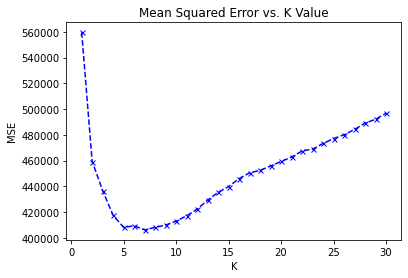

In [15]:
plt.plot(range(1,31), mse_values, color="blue", linestyle="dashed", marker="x", markerfacecolor="red", markersize=5)
plt.title("Mean Squared Error vs. K Value")
plt.xlabel("K")
plt.ylabel("MSE")

plt.show()

# The best k values should be 7. The error is decreased between k=1 to k=7. When k=7 it gets the lowest value. 
# After K=7, error is increased.

## 10 Fold Cross Validation Part

In [16]:
# solution code

from sklearn.model_selection import KFold

x_values = removed_df[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]].values
y_values = removed_df["price"].values

cv10 = KFold(n_splits=10, shuffle=False)
knn_cv =  KNeighborsRegressor(n_neighbors = 3)
score_cv = []

iter = 1
for train_index, test_index in cv10.split(x_values):
    
    x_train, x_test, y_train, y_test = x_values[train_index], x_values[test_index], y_values[train_index], y_values[test_index]
    knn_cv.fit(x_train, y_train)
    
    test_acc = knn_cv.score(x_test, y_test)
    print(f"{iter}. Iteration")
    print(f"Test Accuracy: {test_acc}")
    score_cv.append(test_acc)
    
    iter += 1 

print(f"\nMean accuracy : {np.mean(score_cv)}")

1. Iteration
Test Accuracy: 0.8997494024632031
2. Iteration
Test Accuracy: 0.8904501453629747
3. Iteration
Test Accuracy: 0.881464962116935
4. Iteration
Test Accuracy: 0.8467712980308179
5. Iteration
Test Accuracy: 0.8759551916920474
6. Iteration
Test Accuracy: 0.9549948207849711
7. Iteration
Test Accuracy: 0.9581770475440191
8. Iteration
Test Accuracy: 0.9591699603528868
9. Iteration
Test Accuracy: 0.9525030210131541
10. Iteration
Test Accuracy: 0.916669850867273

Mean accuracy : 0.9135905700228282


## Predicting For a Point
### [0.3, 2, 2, 2, 62.4, 55, 3.9, 2.98, 2.56]

In [17]:
# solution code
features_array = [0.3, 2, 2, 2, 62.4, 55, 3.9, 2.98, 2.56]


print("This price may be : ", knn.predict( [features_array]) )

This price may be :  [473.13333333]
